In [9]:
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

## Stochastic Gradient Descent with $L_2$ Regularization 
$\hat{y} = xw + b$

$ \theta = \begin{bmatrix} 
          w  \\
          b 
     \end{bmatrix} $

$X = \begin{bmatrix} 
          x_1 & 1\\ 
          x_2 & 1\\
          \cdots & \cdots \\
          x_n & 1 
     \end{bmatrix} $

$ \hat{y} = x \theta $  

$J(\theta) = \frac{1}{2n} \sum ( \hat{y}_{test} - y_{test} )^2 + \alpha w^T w$ 

Note that, in regularization we only penalize the weights and not the bias. 

$J(\theta) = \frac{1}{2n} \sum ( x_i \theta - y_{test} )^2 + \alpha w^T w$

$\nabla_{\theta} J(\theta) = -\frac{1}{n} X^T.[X \theta - Y_{test} ]$

$\theta = \theta - \epsilon \nabla_{\theta} J(\theta)$

$\theta = \theta + \frac{\epsilon}{n} X^T.[X \theta - Y_{test}]$

In [14]:
X_tr = np.load("age_regression_Xtr.npy")
n = X_tr.shape[0]
X_tr = X_tr.reshape((n,-1))
ytr = np.load("age_regression_ytr.npy")

In [99]:
# Linear Regression using Stochastic Gradient Descent
def batchloader(X, Y, batchsize = 20):
    n = Y.shape[0]
    idx = np.random.choice(np.arange(n),size=batchsize,replace=False)
    X_batch = X[idx,:]
    Y_batch = Y[idx,:]
    return X_batch, Y_batch

def computeRegularizedCost(X, Y, theta, w, alpha=0.2):
    fMSE = 0
    n = Y.shape[0]
    fMSE = (1/(2*n))*( np.dot( (np.dot(X,theta) - Y).transpose(), np.dot(X,theta) - Y)) + alpha*np.dot(w.T, w) 
    return fMSE 

def computeMSE(X,Y,theta):
    fMSE = 0
    n = Y.shape[0]
    fMSE = (1/(2*n))*( np.dot( (np.dot(X,theta) - Y).transpose(), np.dot(X,theta) - Y))
    return fMSE

def SGD(X, Y, learning_rate=0.001, epochs=100, batchsize = 20, alpha = 0.2):
    
    
    n, m = X.shape
    n, p = Y.shape
    
    w = np.random.randn(m,p)
    b = np.random.randn(p,p)
    
    # preprocessing Data
    X = np.append(X, np.ones((n,1)), axis=1)
    
    n,m_new = X.shape

    COST = np.zeros(epochs)
    THETAs = np.zeros((m_new, p, epochs))
    
    theta = np.append(w, b, axis=0)
    
    for i in range(epochs):
        THETAs[:,:,i] = theta
    
        # Get Batch 
        X_batch, Y_batch = batchloader(X, Y, batchsize) 
        Y_pred = np.dot(X_batch,theta)
        
        # perform gradient descent
        gradJ = (1/n)*( np.dot(X_batch.T, (Y_pred - Y_batch) )) 
        theta = theta - learning_rate * gradJ - 2*alpha*np.append(w,np.zeros((p,p)),axis=0)
         
        w = theta[:m,:p]    

        # get cost
#         COST[i] = computeRegularizedCost(X_batch, Y_batch, theta, w, alpha=alpha)
        COST[i] = computeMSE(X_batch, Y_batch, theta)
    
    return theta, THETAs, COST

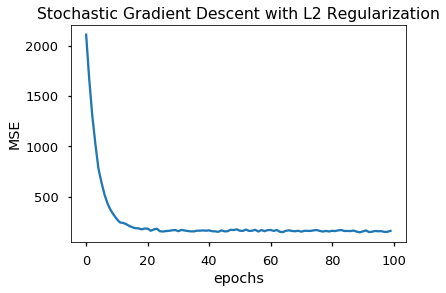

MSE on test data:  163.04242681188114


In [110]:
# Load data
X_tr = np.load("age_regression_Xtr.npy")
n = X_tr.shape[0]
X_tr = X_tr.reshape((n,-1))
ytr = np.load("age_regression_ytr.npy")
ytr = ytr.reshape(-1,1)

batchsize = round(0.2*n)

theta, THETAs, COST = SGD(X_tr, ytr, learning_rate=0.001, epochs=100, batchsize=batchsize, alpha=0.001)

plt.plot(COST)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent with L2 Regularization')
plt.show()

# Testing 
X_te = np.load("age_regression_Xte.npy")
n = X_te.shape[0]
X_te = X_te.reshape((n,-1))

# preprocessing Data
X_te = np.append(X_te, np.ones((n,1)), axis=1)

yte = np.load("age_regression_yte.npy")
yte = yte.reshape(-1,1)
MSE_test = computeMSE(X_te, yte, theta)
print('MSE on test data: ', MSE_test[0,0])